<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The raw data set is a list of edges between nodes. The notebook loads data sets from the github repository, conducts Feature Engineering, Models the data and features using classification algorithms, evaluates their performance and concludes by summarizing the results of the modelling techniques.

1. Open the github code repo.

In [2]:
!git clone https://github.com/umeshrawat/MachineLearning.git

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [13]:
# set the root path of the dataset.
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [14]:
# Load the raw dataset into a Graph object.
import networkx as nx

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)
print(nx_graph)

Graph with 4039 nodes and 88234 edges


Let's find out if there are any self-joint nodes?

In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.5 MB/s eta 0:00:00


In [ ]:
import igraph as ig

# Count the number of self-loop edges in NetworkX
num_self_joints = sum(1 for u, v in nx_graph.edges() if u == v)

print(num_self_joints)

0


--> Above code confirms there are no self-joint (self-directed) nodes.


Now, Let's create features for the raw data set.


**Stage 1: Feature Engineering**

In this stage, we will generate features for the graph data.
These Centrality measures helps us to understand the graph in the following manner:

1. Degree Centrality: Measures the number of immediate neighbors each node has. Helps to know which nodes are most connected in the network.

2. Eigen Vector Centrality: Measures how 'well-connected' a node is in the network. If a node is connected to another important (high degree/influential) node, then this node will have high Eigen vector centrality.

3. Closeness Centrality: How many steps does a node take to reach every other node in the network? Measures the "closeness" of a node with every other node in the network.

4. Betweenness Centrality: Measures if a node is a 'bridge' between differnt clusters. How often does a node appear in the shortest paths between other nodes? Helps to find those nodes that become connections between different groups of nodes within a network.

5. There are other measures like Katz Centrality, PageRank, Percolation Centrality, Subgraph Centrality and Harmonic Centrality that can be analysed if time permits.

In [15]:
#1. Calculate Degree Centrality

import pandas as pd

degree_centrality = nx.degree_centrality(nx_graph)
degreeDataFrame = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
degreeDataFrame_sorted = degreeDataFrame.sort_values('Degree Centrality', ascending=False)
degreeDataFrame_sorted.reset_index(drop=True, inplace=True)
#print(degreeDataFrame_sorted)

--> Analysis:

Above sorted data Frame shows that:
Node 107 has 1045 connections,
Node 1684 has 791 connections.

and at lower end of the spectrum:

Indices 3964 through 4038 have 1 connection each.


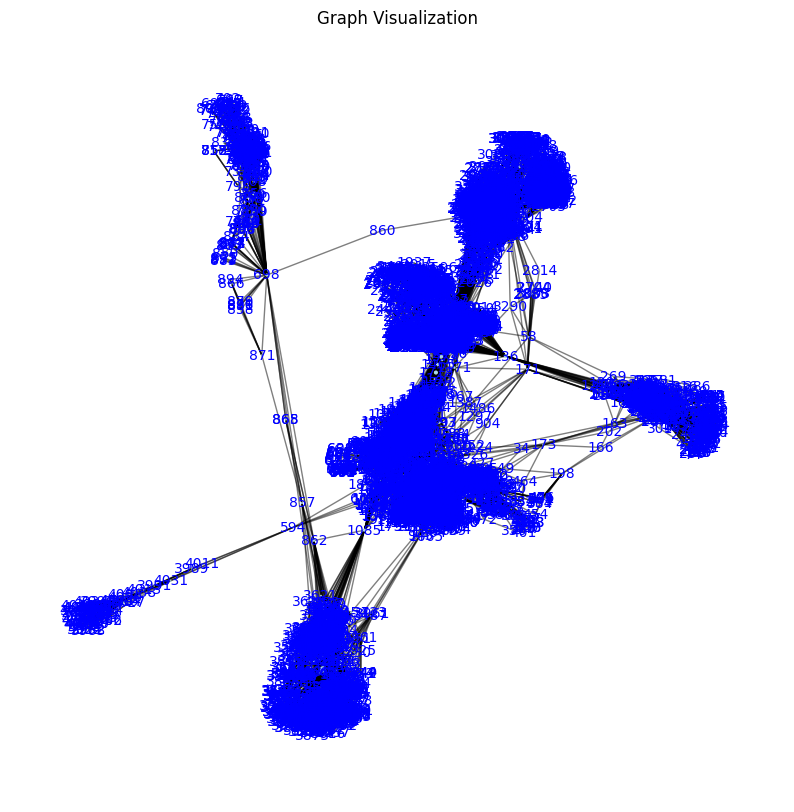

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(nx_graph)  # Choose a layout for the graph
node_sizes = [degree_centrality[node] * 100 for node in nx_graph.nodes()]
# Draw the graph with node sizes and labels
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
nx.draw_networkx_nodes(nx_graph, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(nx_graph, pos, alpha=0.5)
nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_color='blue')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off axis
plt.show()

In [16]:
#2. Calculate Eigen Vector Centrality
eigenVectorcentrality = nx.eigenvector_centrality(nx_graph)

eigenVectorDataFrame = pd.DataFrame(eigenVectorcentrality.items(), columns=['Node', 'Eigen Vector Centrality'])
#print(eigenVectorDataFrame)

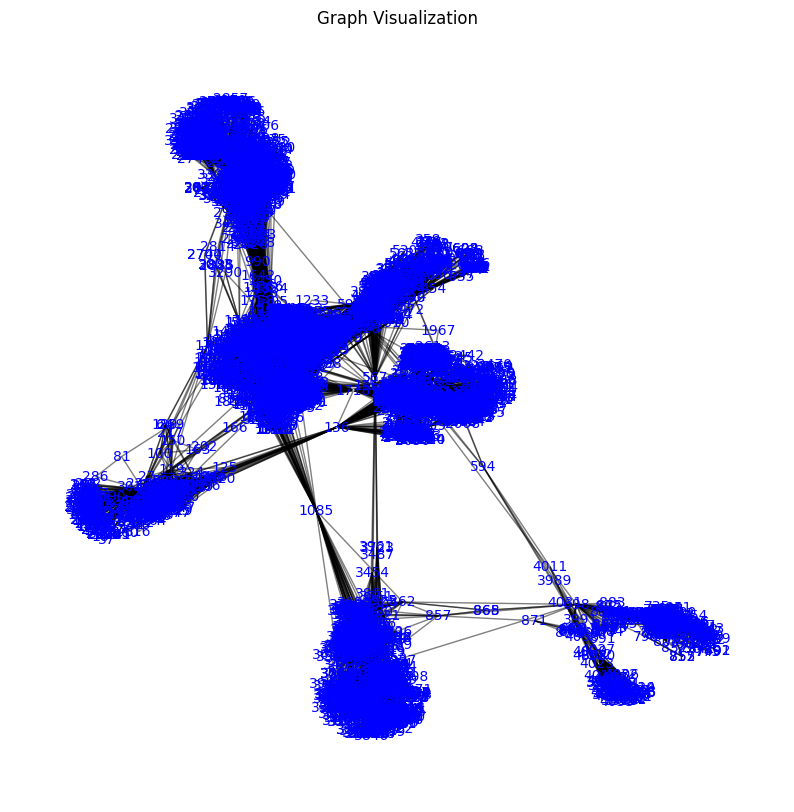

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(nx_graph)  # Choose a layout for the graph
node_sizes = [eigenVectorcentrality[node] * 100 for node in nx_graph.nodes()]
# Draw the graph with node sizes and labels
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
nx.draw_networkx_nodes(nx_graph, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(nx_graph, pos, alpha=0.5)
nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_color='blue')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off axis
plt.show()

In [17]:
from operator import index
#merge the 2 data frames
socialClusterDataFrame = pd.DataFrame()
socialClusterDataFrame = pd.merge(degreeDataFrame_sorted, eigenVectorDataFrame,on = 'Node')
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality
count,4039.000000,4039.000000,4.039000e+03
mean,2019.000000,0.010820,3.864341e-03
std,1166.103197,0.012982,1.525485e-02
min,0.000000,0.000248,6.385265e-14
25%,1009.500000,0.002724,5.388575e-08
50%,2019.000000,0.006191,8.885652e-07
75%,3028.500000,0.014116,3.266349e-05
max,4038.000000,0.258791,9.540696e-02


In [ ]:
print(socialClusterDataFrame)

      Node  Degree Centrality  Eigen Vector Centrality
0      107           0.258791             2.606940e-04
1     1684           0.196137             7.164260e-06
2     1912           0.186974             9.540696e-02
3     3437           0.135463             9.531613e-08
4        0           0.085934             3.391796e-05
5     2543           0.072808             7.287131e-02
6     2347           0.072065             8.032160e-02
7     1888           0.062902             1.060441e-04
8     1800           0.060674             1.019310e-04
9     1663           0.058197             1.285378e-04
10    2266           0.057949             8.698328e-02
11    1352           0.057949             1.270982e-04
12     483           0.057207             1.385700e-05
13     348           0.056711             1.458780e-05
14    1730           0.055968             9.479058e-05
15    1985           0.055473             8.273781e-02
16    1941           0.055225             5.168118e-02
17    2233

Analysis: The above Dataframe shows that the Eigen vector centrality (Influential connections or Well-connected nodes) is low for the top 2 nodes with "many" neighbors (high degree centrality).
Node index 2, 3 have large number of neighbors and influential neighbors.

In [18]:
#3. Closeness Centrality
closenesscentrality = nx.closeness_centrality(nx_graph)
closenessDataFrame = pd.DataFrame(closenesscentrality.items(), columns=['Node', 'Closeness Centrality'])

socialClusterDataFrame = pd.merge(socialClusterDataFrame, closenessDataFrame,on = 'Node')
socialClusterDataFrame.describe()
#Nodes with high closeness centrality mean they are relatively close to all other nodes in the graph.
#Formula = Reciprocal of sum of shortest paths between a node and all other nodes in the graph.

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality
count,4039.000000,4039.000000,4.039000e+03,4039.000000
mean,2019.000000,0.010820,3.864341e-03,0.276168
std,1166.103197,0.012982,1.525485e-02,0.036124
min,0.000000,0.000248,6.385265e-14,0.178255
25%,1009.500000,0.002724,5.388575e-08,0.260348
50%,2019.000000,0.006191,8.885652e-07,0.282457
75%,3028.500000,0.014116,3.266349e-05,0.315001
max,4038.000000,0.258791,9.540696e-02,0.459699


In [11]:
print(socialClusterDataFrame)

      Node  Degree Centrality  Eigen Vector Centrality  \
0      107           0.258791             2.606940e-04   
1     1684           0.196137             7.164260e-06   
2     1912           0.186974             9.540696e-02   
3     3437           0.135463             9.531613e-08   
4        0           0.085934             3.391796e-05   
5     2543           0.072808             7.287131e-02   
6     2347           0.072065             8.032160e-02   
7     1888           0.062902             1.060441e-04   
8     1800           0.060674             1.019310e-04   
9     1663           0.058197             1.285378e-04   
10    2266           0.057949             8.698328e-02   
11    1352           0.057949             1.270982e-04   
12     483           0.057207             1.385700e-05   
13     348           0.056711             1.458780e-05   
14    1730           0.055968             9.479058e-05   
15    1985           0.055473             8.273781e-02   
16    1941    

Analysis: From above, node 1912, 3437 have a high Centrality measures untill now.

In [19]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(nx_graph)
print(betweenness_centrality)


{0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.673274954378314e-06, 42: 0.0, 

In [20]:
betweennessDataFrame = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])
socialClusterDataFrame = pd.merge(socialClusterDataFrame, betweennessDataFrame,on = 'Node')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality,Betweenness Centrality
count,4039.000,4039.000,4039.000,4039.000,4039.000
mean,2019.000,0.011,0.004,0.276,0.001
std,1166.103,0.013,0.015,0.036,0.012
min,0.000,0.000,0.000,0.178,0.000
25%,1009.500,0.003,0.000,0.260,0.000
50%,2019.000,0.006,0.000,0.282,0.000
75%,3028.500,0.014,0.000,0.315,0.000
max,4038.000,0.259,0.095,0.460,0.481


2. Exploratory Data Analysis

<Figure size 2000x2000 with 0 Axes>

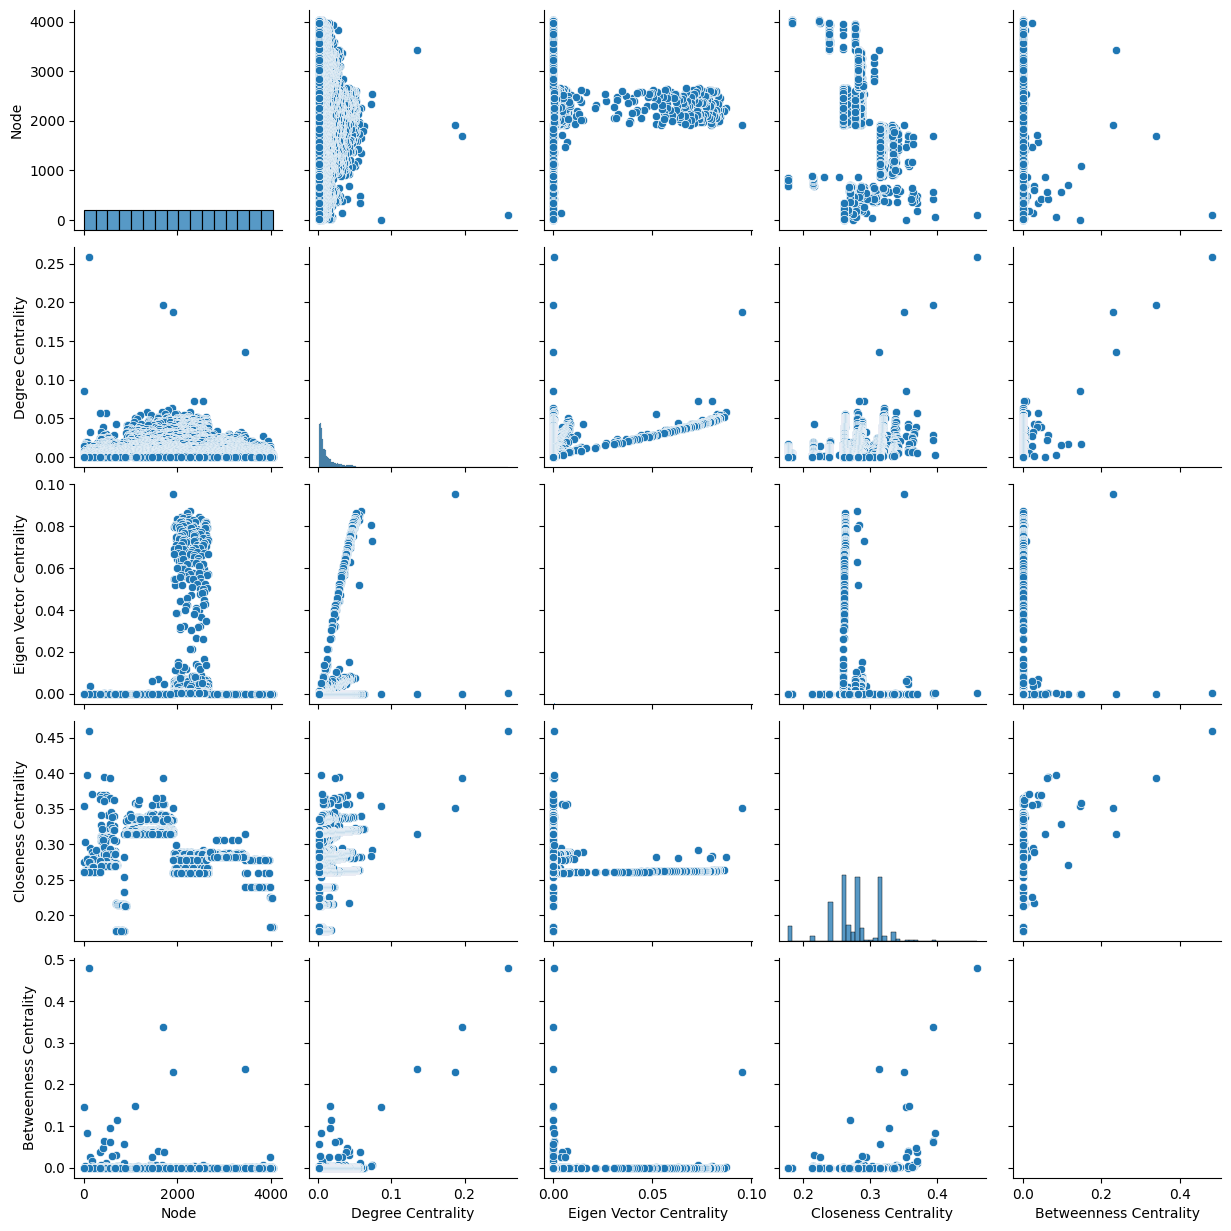

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size
plt.figure(figsize = (20,20))  # Adjust width and height as needed

sns.pairplot(socialClusterDataFrame)
plt.show()

**Stage 2: Modelling.**

We will model using:
1. K-Means.
2. Node2vec
3. Hierarchical.
4. DBScan.

Modelling #1: K-Means

In [10]:
from sklearn.cluster import KMeans

X = socialClusterDataFrame[['Degree Centrality', 'Eigen Vector Centrality', 'Closeness Centrality', 'Betweenness Centrality']]

# Initialize the KMeans model with the desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Add the cluster labels to your dataframe
socialClusterDataFrame['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
socialClusterDataFrame.groupby('cluster').describe()

Node                                                        \
           count     mean      std      min      25%      50%      75%   
cluster                                                                  
0       1311.000 2338.001 1093.892    7.000 1974.500 2806.000 3137.500   
1       1175.000 2352.583 1446.889    1.000  331.500 2497.000 3672.500   
2       1089.000 1353.634  384.656    0.000 1100.000 1372.000 1644.000   
3        201.000 2301.368  215.573 1917.000 2108.000 2309.000 2499.000   
4          4.000 1785.000 1362.732  107.000 1289.750 1798.000 2293.250   
5        259.000 1473.031 1320.661  686.000  751.500  816.000  885.500   

                 Degree Centrality                                            \
             max             count  mean   std   min   25%   50%   75%   max   
cluster                                                                        
0       3962.000          1311.000 0.010 0.009 0.000 0.003 0.007 0.015 0.051   
1       4031.000          1175.000 0.005 0.004 0.000 0.002 0.004 0.006 0.024   
2       3290.000          1089.000 0.013 0.012 0.000 0.005 0.009 0.019 0.086   
3       2655.000           201.000 0.040 0.009 0.021 0.035 0.042 0.047 0.073   
4       3437.000             4.000 0.194 0.051 0.135 0.174 0.192 0.212 0.259   
5       4038.000           259.000 0.004 0.004 0.000 0.001 0.002 0.005 0.042   

        Eigen Vector Centrality                                            \
                          count  mean   std   min   25%   50%   75%   max   
cluster                                                                     
0                      1311.000 0.001 0.002 0.000 0.000 0.000 0.000 0.015   
1                      1175.000 0.001 0.003 0.000 0.000 0.000 0.001 0.035   
2                      1089.000 0.000 0.000 0.000 0.000 0.000 0.000 0.007   
3                       201.000 0.068 0.013 0.037 0.060 0.071 0.079 0.087   
4                         4.000 0.024 0.048 0.000 0.000 0.000 0.024 0.095   
5                       259.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

        Closeness Centrality                                            \
                       count  mean   std   min   25%   50%   75%   max   
cluster                                                                  
0                   1311.000 0.281 0.006 0.266 0.279 0.283 0.284 0.299   
1                   1175.000 0.251 0.011 0.225 0.239 0.260 0.261 0.266   
2                   1089.000 0.320 0.010 0.303 0.315 0.317 0.318 0.397   
3                    201.000 0.263 0.004 0.261 0.262 0.263 0.263 0.291   
4                      4.000 0.380 0.062 0.314 0.342 0.372 0.410 0.460   
5                    259.000 0.188 0.015 0.178 0.178 0.179 0.184 0.217   

        Betweenness Centrality                                            
                         count  mean   std   min   25%   50%   75%   max  
cluster                                                                   
0                     1311.000 0.000 0.003 0.000 0.000 0.000 0.000 0.115  
1                     1175.000 0.000 0.001 0.000 0.000 0.000 0.000 0.025  
2                     1089.000 0.001 0.008 0.000 0.000 0.000 0.000 0.149  
3                      201.000 0.000 0.001 0.000 0.000 0.000 0.000 0.008  
4                        4.000 0.321 0.117 0.229 0.234 0.287 0.373 0.481  
5                      259.000 0.000 0.002 0.000 0.000 0.000 0.000 0.030

Let's find out Elbow plot for k values in the range 1 to 10.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 2, Inertia: 4.254621716980888, Silhouette Score: 0.4527894425002836


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 3, Inertia: 2.9627572369876267, Silhouette Score: 0.5069754024236856


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 4, Inertia: 1.9132261420108816, Silhouette Score: 0.5830217171575515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 5, Inertia: 1.3676845330188498, Silhouette Score: 0.5875822023646462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 6, Inertia: 0.85661585376351, Silhouette Score: 0.5809744836028363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 7, Inertia: 0.677799225486568, Silhouette Score: 0.6099166332241834


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 8, Inertia: 0.5629285559771795, Silhouette Score: 0.6050466995882615


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 9, Inertia: 0.4849536782751501, Silhouette Score: 0.6028387134512367


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 10, Inertia: 0.4240201183141765, Silhouette Score: 0.6061987816664319


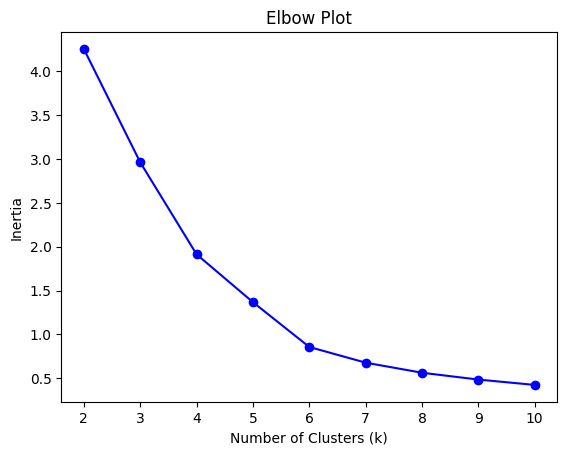

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = socialClusterDataFrame[['Degree Centrality', 'Eigen Vector Centrality', 'Closeness Centrality', 'Betweenness Centrality']]

inertias = []
silhouette_scores = []
for k in range(2, 11):  # Check for k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
    print(f"K: {k}, Inertia: {kmeans.inertia_}, Silhouette Score: {silhouette_score(X, labels)}")

plt.plot(range(2, 11), inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

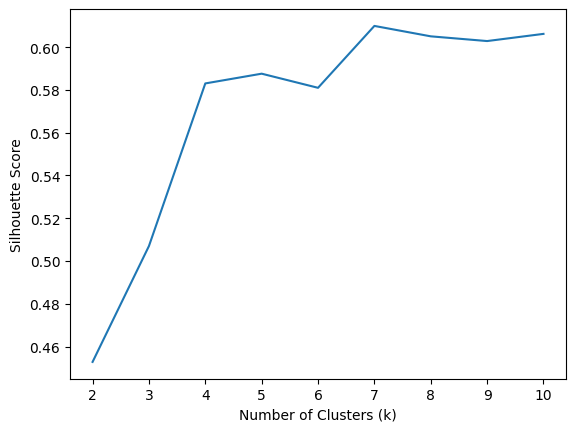

In [17]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

From above calculations and plotting, K = 2 shows the maximum difference in terms of inertia.
Hence taking K = 2 for clustering. Silhouette Score = 0.45 which indicates that the 2 clustes are neither dense nor overlapping.

For k = 4, Inertia value is high, silhouette score is low.
For k = 6, Inertia value reduces, silhouette score decreases.
For k = 7, Inertia value is low, silhouette score is the highest.
**The Elbow and silhouette scores plot above indicates that the graph can be clustered into 7 clusters.**

**This is also supported by the two graphical visualizations of Nodes against Degress Centrality and the EigenVector Centrality.**

**Modelling #2: Node2vec**

Next, Let's use Node2vec algorithm to analyse this data set and deduce graph clustering.

In [18]:
#Code to calculate node2vec algorithm on this graph data
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.

In [23]:
from node2vec import Node2Vec

# Assuming 'graph' is your networkx graph object
node2vec = Node2Vec(nx_graph, dimensions=10, walk_length=2, num_walks=10, workers=4)

# Learn embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get node embeddings
embeddings = model.wv

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

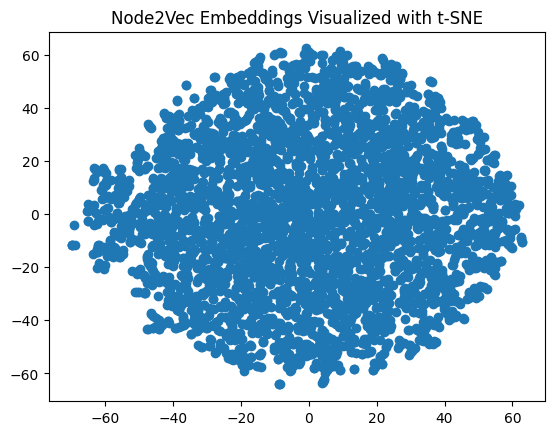

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np # Import numpy for array manipulation

nodes = list(embeddings.key_to_index.keys())
embedding_values = [embeddings[node] for node in nodes]

# Convert list of arrays to a 2D numpy array
embedding_values = np.array(embedding_values)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(embedding_values)

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('Node2Vec Embeddings Visualized with t-SNE')
plt.show()